# Instructions

- This assignment was posted on 30 September, 2024 and is due on ~~18 October 2024~~ 21 October 2024, at 11:59 pm
- Answer all questions in this Jupyter notebook skeleton within the provided cells. Questions will indicate whether the answer should take the form of a coded or written response. Use the dropdown menu within the Jupyter interface to toggle between 'Markdown' or 'Code' for the cells. Do NOT delete or rearrange any of the question blocks within this skeleton.
- The following two files should be submitted to LEARN:
    - This IPYNB file containing the questions and your answers in either code or markdown.
    - A PDF printout of this IPYNB file. To generate this, first run and save the output of all cells. Then expand all cells and print as PDF. Be sure that all your code and answers are visible in the PDF document you submit. 

## Exercise 1. Maximum Likelihood Estimation

The probability density function of a Beta distribution is given by:

$$
p(x) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{\eta},
$$

where $x$ is the value of the random variable, $\alpha$ and $\beta$ are shape parameters, and $\eta$ is a normalizing constant. Suppose that a dataset $\boldsymbol{x} = \{ x_1, x_2, \ldots, x_n \}$ is given, where each observation $x_i$ follows a Beta distribution. It is known that the relationship between the shape parameters is:

$$
\beta = \alpha^2
$$

### **EXERCISE1-TASK1: [10 marks]**

Derive the maximum likelihood estimate of the shape parameter $\beta$. That is, starting with the likelihood function, $\mathcal{L}(\alpha, \beta \mid \boldsymbol{x})$, provide an analytical expression to compute $\beta$, given some $\alpha$.
The normalizing constant $\eta$ can be omitted during differentiation, as it does not affect the location of the maximum.

\begin{aligned}
\mathcal{L}(\alpha, \beta | \mathbf{x}) &= \prod_{i=1}^n p(x_i | \alpha, \beta) \\
p(x_i | \alpha, \beta) &= \frac{x_i^{\alpha - 1} (1 - x_i)^{\beta - 1}}{\eta} \\
\mathcal{L}(\alpha, beta | mathbf{x}) &= \prod_{i=1}^n \frac{x_i^{\alpha - 1} (1 - x_i)^{\beta -1}}{\eta} \\
&= \prod_{i=1}^n x_i^{\alpha - 1} (1 - x_i)^{\beta - 1} \\
\log \mathcal{L}(\alpha, \beta | \mathbf{x}) &= \sum_{i=1}^n (\alpha - 1) \log x_i + (\beta - 1) \log (1 - x_i) \\
&= \sum_{i=1}^n (\alpha - 1) \log x_i + (\alpha^2 - 1) \log (1 - x_i) \\
\frac{\partial \log \mathcal{L}}{\partial \alpha} &= \sum_{i=1}^n \log x_i + 2 \alpha \log (1 - x_i) \\
0 &= \sum_{i=1}^n \log x_i + 2 \alpha \log (1 - x_i) \\
\alpha &= -\frac{\sum_{i=1}^n \log x_i}{\sum_{i=1}^n 2 \log (1 - x_i)} \\
\beta &= \alpha^2 = \left(\frac{\sum_{i=1}^n \log x_i}{\sum_{i=1}^n 2 \log (1 - x_i)} \right)^2
\end{aligned}


### Write your solution here using MathJax and Markdown ###

## Exercise 2. Kernel Density Estimation

### **EXERCISE2-TASK1: [5 marks]**

Perform Kernel (Parzen) Density estimation on the Mystery.csv dataset in the folder, using your own gaussian kernel implemented from scratch.

Detailed instructions: First, define a function `gaussian_kernel(x, xp, ls, variance=1)` that takes as inputs: `x`, a scalar or an array of points where the kernel is evaluated; `xp`, a scalar or an array of data points; `ls`, the length scale (or bandwidth) of the Gaussian kernel; and `variance`, the variance of the Gaussian kernel (which can be set to a default of 1). The function should compute and return the Gaussian kernel value as:

$$
K(x, x') = \frac{1}{\sqrt{2 \pi \text{variance}}} \exp\left(- \frac{(x - x')^2}{2 \cdot \text{variance} \cdot \text{ls}^2}\right).
$$

After implementing the Gaussian kernel function, perform Kernel Density Estimation (KDE) on the dataset. Use a length scale of 0.05. To do this, define 100 evaluation points uniformly over the range [0,1], and compute the empirical density at each evaluation point. Finally, create a scatter plot of the sample data points along the 1D line and plot the estimated density using the evaluation points. Label the axes appropriately.

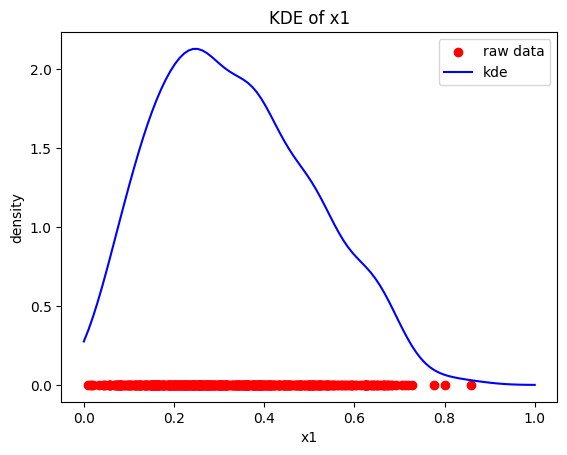

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def gaussian_kernel(x, xp, ls, variance=1):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - xp) ** 2 / (2 * variance * ls**2))

mystery = pd.read_csv('mystery.csv')
x1 = mystery['x1'].values

xs = np.linspace(0, 1, 100)
ls = 0.05

kde = np.zeros_like(xs)
for i, x in enumerate(xs):
    kde[i] = np.sum([gaussian_kernel(x, xp, ls) for xp in x1]) / (len(x1) * ls)

plt.figure()
plt.scatter(x1, np.zeros_like(x1), color='red', label='raw data')
plt.plot(xs, kde, color='blue', label='kde')
plt.xlabel('x1')
plt.ylabel('density')
plt.title('KDE of x1')
plt.legend()
plt.show()

### **EXERCISE2-TASK2: [5 marks]**

Implement the Kullback-Leibler (KL) divergence and use it to compare the empirical distribution from Part 1 against two fitted parametric distributions: the Beta distribution and the Gaussian distribution.

Detailed instructions: Start by defining a function `compute_kl_divergence(ps, qs, epsilon=1e-3)` that computes the empirical KL divergence between two probability distributions evaluated at a set of points over the domain: `ps` (the reference distribution) and `qs` (the model distribution). Recall that the KL divergence is computed as

$$
D_{\text{KL}}(P \parallel Q) = \sum_x P(x) \log\left(\frac{P(x)}{Q(x)}\right).
$$

To avoid issues with division by zero or logarithm of zero, clip values from below by a small constant `epsilon` set to 1e-3. This ensures numerical stability in the computation. Next, estimate the parameters of the sample data using `scipy.stats.beta.fit()` to obtain a fitted Beta distribution, and fit a Gaussian distribution to the data using the sample mean and standard deviation. Evaluate your fitted parametric models at the same evaluation points that you used in Part 1. Be sure to normalize each distribution (empirical, Beta, and Gaussian) so that the sum of the probabilities over the evaluation points is equal to 1 before computing the KL divergence. Using the KL divergence function, compute the KL divergence between the empirical distribution (KDE from Part 1) and each of the fitted Beta and Gaussian distributions. Print out the KL divergence values for comparison.

Based on the KL divergence values, which parametric distribution (Beta or Gaussian) better approximates the empirical distribution? Provide one sentence to interpret the results. Include a plot showing the empirical KDE, the fitted Beta distribution, and the fitted Gaussian distribution to support your explanation. Make sure to label all axes and provide a legend.

kLdiv(kde, q_beta): 0.0020928279638875403
kLdiv(kde, q_gaussian): 0.01994165021805469


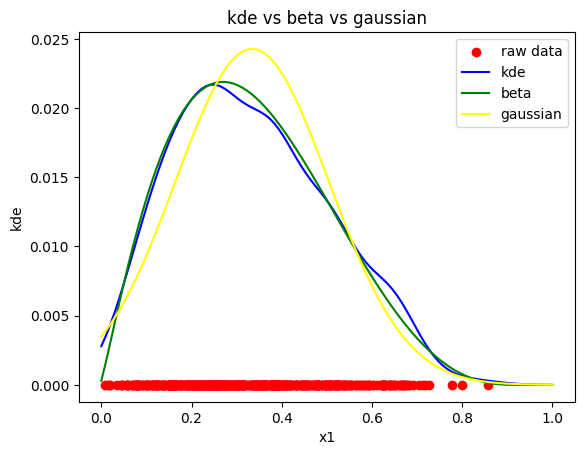

In [2]:
from scipy.stats import beta, norm

# normalize the kde
kde /= np.sum(kde)

def compute_kl_divergence(ps, qs, epsilon=1e-3):
    ps = np.clip(ps, epsilon, None)
    qs = np.clip(qs, epsilon, None)
    return np.sum(ps * np.log(ps / qs))

beta_dist = beta.fit(x1)
q_beta = beta.pdf(xs, *beta_dist)
q_beta /= np.sum(q_beta)

mu, sigma = np.mean(x1), np.std(x1)
q_gaussian = norm.pdf(xs, mu, sigma)
q_gaussian /= np.sum(q_gaussian)

kl_beta = compute_kl_divergence(kde, q_beta)
kl_gaussian = compute_kl_divergence(kde, q_gaussian)

print(f"kLdiv(kde, q_beta): {kl_beta}")
print(f"kLdiv(kde, q_gaussian): {kl_gaussian}")

plt.figure()
plt.scatter(x1, np.zeros_like(x1), color='red', label='raw data')
plt.plot(xs, kde, color='blue', label='kde')
plt.plot(xs, q_beta, color='green', label='beta')
plt.plot(xs, q_gaussian, color='yellow', label='gaussian')
plt.xlabel('x1')
plt.ylabel('kde')
plt.title('kde vs beta vs gaussian')
plt.legend()
plt.show()

# The beta distribution is a better fit since its kl divergence is lower than that of the gaussian.

## Exercise 3. Logistic Regression

### **EXERCISE3-TASK1: [5 marks]**

Implement a logistic regression model and a function to compute the gradient of the cross-entropy loss with respect to the parameters. 

Detailed instructions: Start by defining a function `predict_prob(w, x)` that computes the predicted probability of the positive class for a given feature vector `x` and weight vector `w`. Recall that in logistic regression, the predicted probability is given by: 

$$
\hat{y} = \frac{1}{1 + e^{-\langle w, x \rangle}},
$$

where $\langle w, x \rangle$ is the inner (dot) product between the parameter vector and feature vector. Next, implement a function called `compute\_gradient(ys, xs, w)` that computes the gradient of the loss function with respect to the weight vector `w`, using the true labels `ys`, and feature vectors `xs`. Define a function for the gradient of the cross-entropy loss, and verify that the implementation is correct by generating a synthetic dataset with a single feature using `numpy` and known parameters. You may find the function `numpy.random.choice` useful. Since the true parameters correspond to the generating distribution of the labels, the gradient should be close to zero at this point. Print the gradient at the true parameters.

In [3]:
import numpy as np

def predict_prob(w, x):
    return 1 / (1 + np.exp(-np.dot(w, x)))

def compute_gradient(ys, xs, w):
    n = xs.shape[0]
    gradient = np.zeros_like(w)

    for i in range(n):
        x_i = xs[i]
        y_i = ys[i]
        y_hat = predict_prob(w, x_i)
        gradient += (y_hat - y_i) * x_i
    
    gradient /= n 
    
    return gradient

n = 100
n_features = 1

xs = np.random.randn(n, n_features)

w = np.array([2.0])
probs = 1 / (1 + np.exp(-np.dot(xs, w)))
ys = [np.random.choice([0, 1], p=[1 - prob, prob]) for prob in probs.flatten()]

grad = compute_gradient(ys, xs, w)
print("Gradient:", grad)


Gradient: [-0.01456655]


### **EXERCISE3-TASK2: [5 marks]**
    
Build and train a logistic regression model using gradient descent on the `heart.csv` dataset in the folder, and visualize the loss in successive training epochs. You may use `pandas`, `matplotlib`, and `numpy`.

Detailed instructions: 
Begin by loading the heart disease dataset stored in `heart.csv`. Note that this dataset has categorial columns ("cp" and ""), that must be converted to one-hot encoded columns. The labels, that indicate the presence or absence of heart disease, are stored in the "target" column. Split the dataset into disjoint training set (66%) and a testing set (33%). 

Implement a function `grad_descent` that performs gradient descent to update the parameter vector. Include options for specifying the learning rate, tolerance for early stopping (if weights stop changing), and maximum number of iterations per training epoch. Consider how you would track convergence and decide when to stop the optimization.

Finally, train your model using gradient descent. Use a learning rate of `1e-4`, tolerance of `1e-6`, and a maximum number of iterations per training epoch of 10000. Train your model over 10 iterations, and compute and track the cross-entropy loss on the testing set after each epoch of gradient descent. Use the function `predict_prob` from **EXERCISE3-TASK1** to return the predicted probability for a given set of inputs. Plot the loss values over multiple epochs to visualize how the model converges. 

100%|██████████| 10000/10000 [00:14<00:00, 682.66it/s]


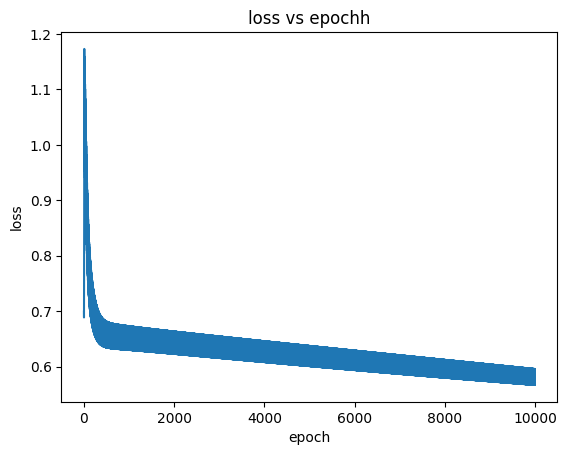

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def grad_descent(x_train, y_train, x_test, y_test, w, learning_rate=1e-4, tolerance=1e-6, max_iter=10000):
    losses = []
    for _ in tqdm(range(max_iter)):
        gradient =  learning_rate * compute_gradient(y_train, x_train, w)
        w -= gradient
        y_preds  = np.array([predict_prob(w, x) for x in x_test])
        loss = -np.mean(y_test * np.log(y_preds) + (1 - y_test) * np.log(1 - y_preds))
        losses.append(loss)
        if np.linalg.norm(gradient) < tolerance:
            break
    return w, losses

df = pd.read_csv('heart.csv')
df = pd.get_dummies(df, columns=['cp', 'restecg'])

xs = df.drop(columns=['target']).values.astype(float)
ys = df['target'].values.astype(float)

bias = np.ones((xs.shape[0], 1))
xs = np.hstack((bias, xs))

train_size = int(0.66 * len(xs))
x_train, x_test = xs[:train_size], xs[train_size:]
y_train, y_test = ys[:train_size], ys[train_size:]

n_features = x_train.shape[1]

w = np.zeros(n_features)
w, losses = grad_descent(x_train, y_train, x_test, y_test, w, learning_rate=1e-4, tolerance=1e-6, max_iter=10000)

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epochh')
plt.show()


## Exercise 4. Stochastic Gradient Descent
### **EXERCISE4-TASK1: [10 marks]**
Show how the Perceptron algorithm can be interpreted as a particular form of stochastic gradient descent (SGD). 
In particular, you must provide a loss function and a gradient step size (learning rate) such that SGD with these parameters and the perceptron algorithm sare identical. This question was adapted from Prof. Gautam Kamath, in his Introduction to ML course as taught in Fall 2023. 

Detailed instructions: Recall that in the Perceptron algorithm, a parameter update occurs only when a sample is misclassified. Determine a loss function that assigns zero loss for correctly classified samples and a positive loss for misclassified samples. The Perceptron algorithm uses a fixed step size (learning rate) for updating the weights whenever a sample is misclassified. Determine what the learning rate should be in your SGD setup so that the resulting parameter updates are identical to those in the Perceptron algorithm.

In [5]:
### Write your solution here using MathJax and Markdown ###

# We want the perceptron update  on misclassification to look like
# w = w + yx
# b = b + y

# So we want to find a loss fun and learnign rate that makes the gradient of the loss fn wrt w and b to match the above
# L(x, w, b) = max(0, -y (w.T x + b))
# dL/dw = 0 if y (w.T x + b) > 0 else -yx
# dL/db = 0 if y (w.T x + b) > 0 else -y

# the gradient descent update is given as
# w = w - lr * dL/dw
# b = b - lr * dL/db

# Combining this with settign the learning rate to 1 gives us the perceptron update.

## Exercise 5. Hard-Margin SVM

### **EXERCISE5-TASK1: [20 marks]**

Implement a Support Vector Machine (SVM) for binary classification using the dual formulation of the hard-margin SVM problem, and apply it to the Iris dataset. 

Detailed instructions: Begin by loading the `Iris.csv` dataset and filter it to include only two classes, 
Convert the target variable `variety` to binary labels, where `Setosa` is labeled as `+1` and all other classes are labeled as `-1`. Construct a 66\%/33\s% train/test split.
You may use methods from `sklearn.preprocessing` to conduct these steps.

Next, set up the dual problem for optimization problem using `cvxpy`. This will involve creating a `cvxpy` variable to represent the Lagrange multipliers $\lambda$, as well as specifying the objective and the constraints. Recall that the dual form of the hard-margin SVM problem is:

$$
\max_{\lambda} \left( \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j \langle x_i, x_j \rangle \right),
$$

subject to:

$$
\lambda_i \geq 0 \;\ \forall i, \quad \text{and} \;\ \sum_{i=1}^{n} \lambda_i y_i = 0,
$$

where $\lambda_i$ are the Lagrange multipliers, $y_i$ are the true labels, $x_i$ are the feature vectors, and $\langle x_i, x_j \rangle$ is the inner product between feature vectors $x_i$ and $x_j$.
To ensure that the matrix used in the quadratic term is positive semi-definite, you may add a small regularization term, to the diagonal elements. Solve the optimization problem using `cvxpy` and extract the Lagrange multipliers from the solution.

After obtaining the optimized Lagrange multipliers, compute the weight vector $w$ as a linear combination of the training feature vectors and class labels. Calculate the bias term $b$ using the support vectors.

Finally, define a function to make predictions based on the computed weight vector and bias term. Use this function to evaluate the model's performance on the testing set by generating and plotting the confusion matrix as well as computing the ROC AUC score. For evaluation, you may use methods in `sklearn.metrics`.

lambdas: [-5.06278419e-16 -9.00789364e-17 -1.90212709e-15  1.07284550e-15
  1.78770451e-16  1.41526102e-15 -1.92553382e-15 -2.11539822e-15
  4.32182697e-16 -6.09194777e-16 -1.05380190e-15 -8.03626583e-16
  2.95207725e-16 -4.32096718e-16 -1.56765336e-15 -2.86588288e-15
  3.02947741e-16  8.82710400e-16  5.31550109e-16  7.70070161e-16
 -9.04500384e-16 -2.68296506e-15  1.79070235e-16  1.82504037e-15
 -9.44457161e-16  1.11762369e-15 -1.70884411e-15 -5.23267531e-16
  3.42941937e-17 -8.43743353e-16  6.09124698e-16  6.47706958e-16
  4.08646334e-01  5.11331482e-17 -1.59265265e-15  5.19819070e-16
 -1.96585630e-15 -2.62778082e-16  2.49149382e-16 -1.55390377e-15
 -5.27866434e-16  6.81089777e-16  3.11534201e-16 -2.66338533e-16
 -9.51539934e-16 -3.05404577e-15  4.62915006e-17 -3.57125947e-16
 -2.17468402e-15  6.28753957e-16  5.34697448e-16 -1.05059655e-15
  2.46114575e-16 -2.31124545e-16 -1.12068970e-15 -3.71934805e-16
 -1.04034477e-15 -5.97463853e-16 -1.50056218e-15  3.21568980e-16
 -1.87277401e-16

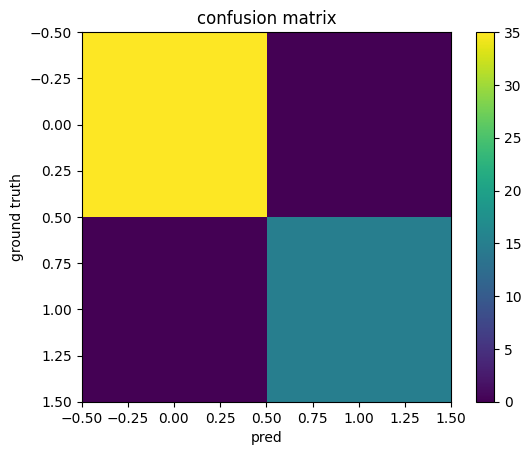

In [9]:
from sklearn.preprocessing import StandardScaler
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score

iris = pd.read_csv('iris.csv')
iris['variety'] = iris['variety'].apply(lambda x: 1 if x == 'Setosa' else -1)

x = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
y = iris['variety'].values

n = int(0.67 * len(x))

indices = np.random.permutation(len(x))
x_train, x_test = x[indices[:n]], x[indices[n:]]
y_train, y_test = y[indices[:n]], y[indices[n:]]

n_samples, n_features = x_train.shape

lambdas = cp.Variable(n_samples)
obj = cp.Maximize(cp.sum(lambdas) - (1/2) * cp.quad_form(cp.multiply(y_train, lambdas), np.dot(x_train, x_train.T) + 1e-6 * np.eye(n_samples)))
constraints = [lambdas >= 0, cp.sum(cp.multiply(y_train, lambdas)) == 0]
problem = cp.Problem(obj, constraints)
problem.solve()

print(f"lambdas: {lambdas.value}")

w = np.dot(x_train.T, lambdas.value * y_train)
mask = np.where(lambdas.value > 1e-6)[0]
b = np.mean(y_train[mask] - np.dot(x_train[mask], w))

def pred(x):
    return np.sign(np.dot(x, w) + b)

y_preds = pred(x_test)

matrix = confusion_matrix(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

print(f"roc_auc: {roc_auc}")

plt.figure()
plt.imshow(matrix)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('ground truth')
plt.xlabel('pred')
plt.show()


EXERCISE 6. Feature Embeddings and the Kernel Trick

The dataset in the next cell is characterized by two classes, wherein one is nested within the other. This is a classic example of non-linearly separable data in the original feature space.

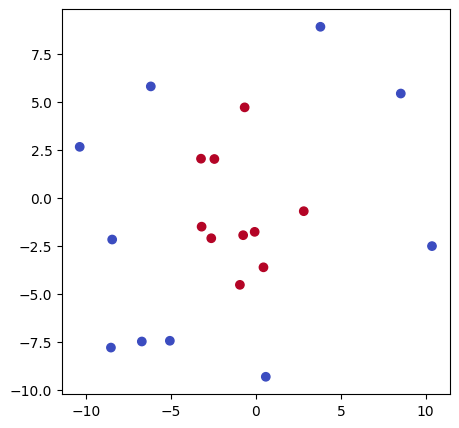

In [10]:
np.random.seed(42)
def generate_nested_hyperspheres(n_samples_per_class, n_features, r1 = 0.1, r2 = .3):
    data_xs1 = np.random.normal( size = (n_samples_per_class, n_features) )
    data_xs1 /= np.linalg.norm(data_xs1, axis=1,keepdims = True) * r1
    data_xs2 = np.random.normal( size = (n_samples_per_class, n_features) )
    data_xs2 /= np.linalg.norm(data_xs2, axis = 1,keepdims = True) * r2

    # Stack classes and create labels
    data_xs = np.concatenate([data_xs1,data_xs2],axis=0)
    data_xs += np.random.normal( scale = 1., size = data_xs.shape)
    label_ys = np.concatenate([np.ones(n_samples_per_class)*i for i in [-1,1] ])
    return data_xs, label_ys

data_xs,label_ys = generate_nested_hyperspheres( n_samples_per_class = 10, 
                                                   n_features = 2)
fig,ax = plt.subplots(1,1,figsize=(5.,5.))
ax.scatter(data_xs[:,0],data_xs[:,1],c=label_ys,cmap='coolwarm')
plt.show()

**EXERCISE6-TASK1 [10 marks]**
Design a valid feature embedding that transforms the original features into a new space where the classes are linearly separable. 

Detailed instructions: Implement a function `feature_map(data_xs)` that maps the original features to a (possibly higher-dimensional) space using a custom transformation. Mkae the function general so that it works even if the number of original features changes. You may use feature transformation that you believe will make the data linearly separable in the transformed space. Implement a custom kernel function `kernel(data_xs)` that computes the similarity between data points using your designed feature embedding.
Defend your choice of kernel function by referencing the conditions for a valid kernel.

In [17]:
def feature_map(data_xs):
    n, d = data_xs.shape
    quadratic_terms = np.array([data_xs[:, i] * data_xs[:, j] 
                           for i in range(d) 
                           for j in range(i, d)]).T
    
    return np.column_stack([data_xs, quadratic_terms, np.ones((n, 1))])

def kernel(data_xs):
    return (np.dot(data_xs, data_xs.T) + 1)**2

# The kernel is valid since it satisifies both being symmetric (sicne the dot product is symmetric) and being PSD since the kernel is the square of the dot product of the features (plus a constant), which is always non-negative.

The **kernel trick** allows us to obtain the result of an inner product between feature vectors in a high-dimensional feature space, without having to explicitly compute the embeddings. 

**EXERCISE6-TASK2 [ 10 marks]**

Experimentally investigate the computational advantages of the kernel trick by comparing the time required to compute the Gram matrix (or kernel matrix) using explicit feature mappings versus implicit kernel computations. 

Detailed instructions:
Use `generate_nested_hyperspheres` to generate synthetic datasets with different numbers of samples (explore 100,200,500,1000,2000) and features (explore 2,5,10,20,50,100,200). 
Using your feature embedding, measure the time (wall clock time) required to generate the Gram matrix (including feature embedding and generation of the Gram matrix using these features).
In parallel, measure the time to generate the Gram matrix implicitly using your kernel function. 
Create two plots: one that shows how run time depends on the # samples and # features if you explicitly transform the features, and another that shows this same information, but if the Gram is generated using implicit kernel computations. 
Share the y-axes between the two plots to simplify direct comparison.

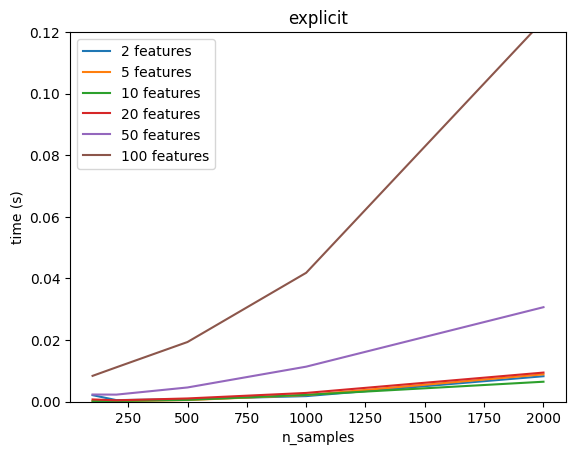

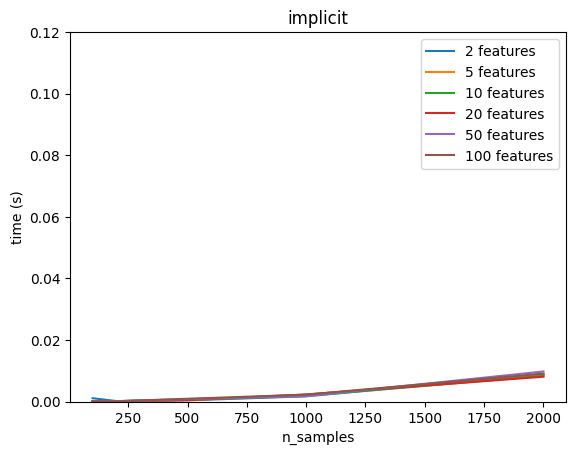

In [24]:
import time

# vary the dataset sizes
N_SAMPLES = [100, 200, 500, 1000, 2000] 
N_FEATURES = [2, 5, 10, 20, 50, 100]

# FOR storing the timing results
timing_results = {
    'n_samples': [],
    'n_features': [],
    'explicit': [],
    'implicit': []
}

for n_samples in N_SAMPLES:
    for n_features in N_FEATURES:
        data_xs, _ = generate_nested_hyperspheres(n_samples // 2, n_features)
        
        start_time = time.time()
        mapped_features = feature_map(data_xs)
        gram_matrix_explicit = np.dot(mapped_features, mapped_features.T)
        explicit_time = time.time() - start_time

        start_time = time.time()
        gram_matrix_implicit = kernel(data_xs)
        implicit_time = time.time() - start_time

        timing_results['n_samples'].append(n_samples)
        timing_results['n_features'].append(n_features)
        timing_results['explicit'].append(explicit_time)
        timing_results['implicit'].append(implicit_time)

for n_features in N_FEATURES:
    df_subset = df[df['n_features'] == n_features]
    plt.plot(df_subset['n_samples'], df_subset['explicit'], label=f'{n_features} features')

plt.xlabel('n_samples')
plt.ylabel('time (s)')
plt.ylim(0, 0.12)
plt.title('explicit')
plt.legend()
plt.show()

for n_features in N_FEATURES:
    df_subset = df[df['n_features'] == n_features]
    plt.plot(df_subset['n_samples'], df_subset['implicit'], label=f'{n_features} features')

plt.xlabel('n_samples')
plt.ylabel('time (s)')
plt.ylim(0, 0.12)
plt.title('implicit')
plt.legend()

plt.show()

## EXERCISE 7. Cross-Validation

### **EXERCISE7-TASK1 [10 marks]**

Apply Gaussian Process Regression to the Insurance dataset and select hyperparameters via cross-validation. 

Detailed instructions: The Insurance dataset contains information about various health factors alongside medical insurance charges. The target variable you will try to predict is this `charges` attribute, given the other features. 
Split the data into a training set (50%) for cross-validation, as well as a holdout dataset (50%) to provide an unbiased final model evaluation.
Apply Z-score scaling to the features and the target before proceeding to fitting/hyperparameter selection, being sure to avoid data leakage in the process. 

Implement Gaussian Process Regression using the `GaussianProcessRegressor` class from the `sklearn.gaussian_process` module with the `RBF` kernel. For hyperparameter selection, focus on the length scale as well as the regularization (`alpha` parameter) for the RBF kernel. Explore a range of possible length scale values (e.g., `[1.0, 2.0, 5.0, 10.0, 20.0]`) and alpha (e.g. `[0.1,0.2,1.0,2.0,10.0]`), and select the model using 5-fold cross-validation. 
Recall that this means you should divide the data into 5 equal folds, and for each combination of hyperparameters, fit the model on 4 folds and evaluate it on the remaining fold using mean squared error (MSE) as the evaluation metric.
You may NOT use `GridSearchCV` from `sklearn.model_selection` for this part. Be sure to set `n_restarts` to some integer greater than `1` to help find the global optimum. WARNING: This process will take a few minutes, depending on your machine. Consider implementing a progressbar using `tqdm` library so you can move on to others things if you like, while you wait :)

Once the hyperparameters have been selected, train your GPR on the full training set (in essence, using ALL folds) and evaluate it on the holdout dataset. Generate a scatter plot of the predicted `charges` scores (on the y-axis) against the true `charges` scores (on the x-axis), for data in the holdout dataset. Print the final MSE on the holdout set and provide a brief comment (1-2 sentences) on the results.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import RBF

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv("insurance.csv")

x = data.drop("charges", axis=1)
x = pd.get_dummies(x, columns=["sex", "smoker", "region"], drop_first=True)

y = data["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

length_scale_range = [1.0, 2.0, 5.0, 10.0, 20.0]
alpha_range = [0.1, 0.2, 1.0, 2.0, 10.0]

best_mse = 1e10
best_params = {}

k_folds = KFold(n_splits=5, shuffle=True)

for length_scale in length_scale_range:
    for alpha in alpha_range:
        mse_scores = []
        for train_index, val_index in k_folds.split(x_train):
            x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            kernel = RBF(length_scale=length_scale)
            model = GaussianProcessRegressor(kernel=kernel, alpha=alpha, n_restarts_optimizer=5, random_state=42)

            model.fit(x_train_fold, y_train_fold)
            y_pred_fold = model.predict(x_val_fold)

            mse = mean_squared_error(y_val_fold, y_pred_fold)
            mse_scores.append(mse)

        avg_mse = sum(mse_scores) / len(mse_scores)

        if avg_mse < best_mse:
            best_mse = avg_mse
            best_params = {"length_scale": length_scale, "alpha": alpha}

kernel = RBF(length_scale=best_params["length_scale"])
model = GaussianProcessRegressor(kernel=kernel, alpha=best_params["alpha"])

model.fit(x_train, y_train)

GaussianProcessRegressor(alpha=0.2, kernel=RBF(length_scale=20))

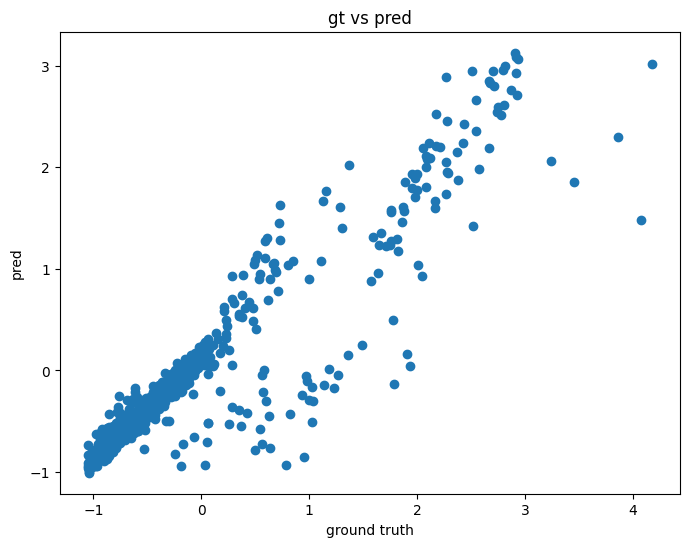

best_params={'length_scale': 20.0, 'alpha': 0.2}
mse_holdout=np.float64(0.1546248410781504)


In [35]:
y_pred_holdout = model.predict(x_test)
mse_holdout = mean_squared_error(y_test, y_pred_holdout)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_holdout)
plt.xlabel("ground truth")
plt.ylabel("pred")
plt.title("gt vs pred")
plt.show()

print(f"{best_params=}")
print(f"{mse_holdout=}")

# The model is pretty good at predicting, mse beign 0.15 on the scaled targets. there are some "modes" of the data where the model is better/less accurate.
# 
# For example, there's a dense linear band of points from -1,1 on up and to the right where the model is very accurate,
# and a second, sparser band of points from 0,-1 on up and to the right where the model is still nicely correlated with the true values but is off by a roughly constant amount.
# lastly there rae outliers but thats unavoidable to some degree.